In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\HP\Documents\superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
 !pip install --upgrade xlrd


In [4]:
#A review of the dataset

print("\n Data types and non-null counts:")
print(df.info())

print("\n Summary statistics (numerical columns):")
print(df.describe())

print("\n Preview of the first 5 rows:")
print(df.head())

print("\n Preview rows and columns:")
print(df.shape)


 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object 

In [5]:
#Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [6]:

# Function to detect and remove outliers using IQR
# def remove_outliers_iqr(df, columns=None):
#     if columns is None:
#         columns = df.select_dtypes(include=['float64', 'int64']).columns
    
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Filter the dataframe
#         data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
#     return data

# # Remove outliers from numeric columns
# df_clean = remove_outliers_iqr(df)

# print("Original shape:", df.shape)
# print("After removing outliers:", df_clean.shape)


In [7]:
# import math
# import matplotlib.pyplot as plt

# numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# n = len(numeric_cols)               # number of numeric columns
# rows = math.ceil(n/2)               # number of rows (2 plots per row)

# plt.figure(figsize=(12, 5*rows))
# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(rows, 2, i)         # flexible grid
#     sns.boxplot(y=df[col])
#     plt.title(f"Outliers in {col}")
# plt.tight_layout()
# plt.show()

In [8]:
#Best selling products

Best_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10).reset_index()
Best_selling_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


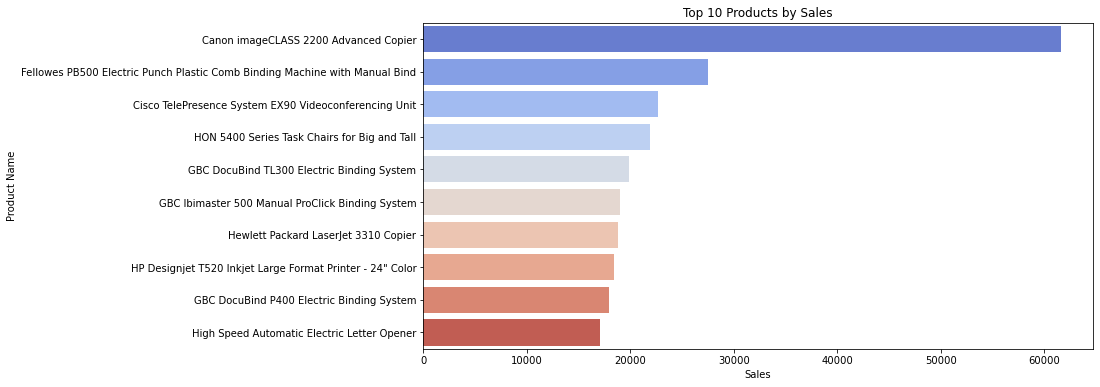

In [9]:
# Plot
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=Best_selling_products, x="Sales", y="Product Name", palette="coolwarm")
plt.title("Top 10 Products by Sales")
plt.show()

In [10]:
#What time of the year do the sales pick

import pandas as pd
import calendar

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year, Month number, and Month name
df['Year'] = df['Order Date'].dt.year
df['Month_Num'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.month_name()

# Group by Year + Month_Num + Month
monthly_sales = (
    df.groupby(['Year', 'Month_Num', 'Month'], as_index=False)['Sales']
      .sum()
      .sort_values(['Year', 'Month_Num'])
)

# Ensure Month is categorical for correct plotting order
monthly_sales['Month'] = pd.Categorical(
    monthly_sales['Month'],
    categories=list(calendar.month_name)[1:],  # Jan → Dec
    ordered=True
)

print(monthly_sales)   # Show first 20 rows
print(monthly_sales['Year'].unique())  # Check all years present



    Year  Month_Num      Month        Sales
0   2011          1    January   13946.2290
1   2011          2   February    4810.5580
2   2011          3      March   55691.0090
3   2011          4      April   28295.3450
4   2011          5        May   23648.2870
5   2011          6       June   34595.1276
6   2011          7       July   33946.3930
7   2011          8     August   27909.4685
8   2011          9  September   81777.3508
9   2011         10    October   31453.3930
10  2011         11   November   78628.7167
11  2011         12   December   69545.6205
12  2012          1    January   18174.0756
13  2012          2   February   12210.8670
14  2012          3      March   38466.7960
15  2012          4      April   34195.2085
16  2012          5        May   30131.6865
17  2012          6       June   24797.2920
18  2012          7       July   28765.3250
19  2012          8     August   36898.3322
20  2012          9  September   64595.9180
21  2012         10    October  

In [19]:
# Group by month only (ignore year for now)
avg_monthly_sales = monthly_sales.groupby('Month')['Sales'].mean().reset_index()

# Sort by Sales in descending order
avg_monthly_sales = avg_monthly_sales.sort_values(by='Sales', ascending=False)

print(avg_monthly_sales)

        Month         Sales
10   November  87280.018500
11   December  83044.289875
8   September  77442.524925
2       March  49813.246000
9     October  49278.800425
7      August  39897.362750
4         May  39030.571675
6        July  37395.209500
5        June  36770.652825
3       April  35462.891850
0     January  23841.484400
1    February  15043.162350


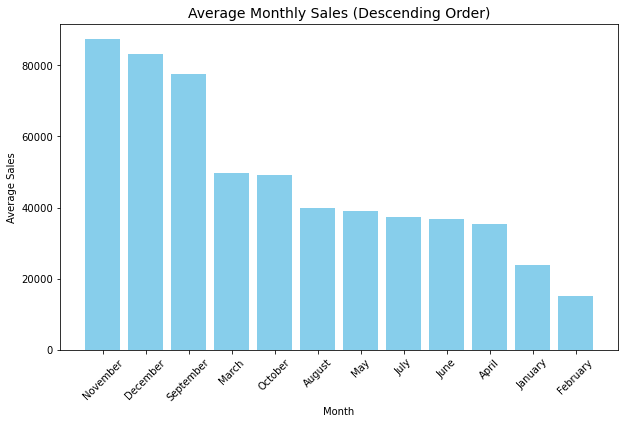

In [16]:

plt.figure(figsize=(10,6))
plt.bar(avg_monthly_sales['Month'], avg_monthly_sales['Sales'], color="skyblue")
plt.title("Average Monthly Sales (Descending Order)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()

In [21]:
#Which categories or regions bring the most revenues
#categories

Best_selling_category = df.groupby('Category')['Sales'].sum().reset_index()
Best_selling_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


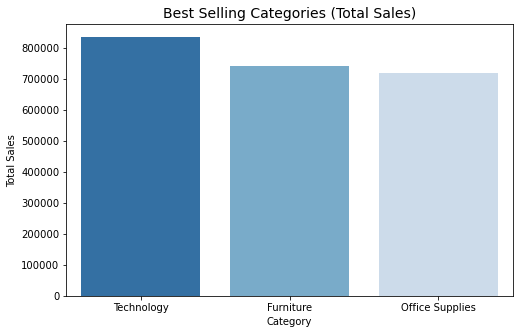

In [27]:
# Sort values for better visualization
Best_selling_category = Best_selling_category.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=Best_selling_category, x='Category', y='Sales', palette="Blues_r")
plt.title("Best Selling Categories (Total Sales)", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [22]:
Best_selling_region = df.groupby('Region')['Sales'].sum().reset_index()
Best_selling_region

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


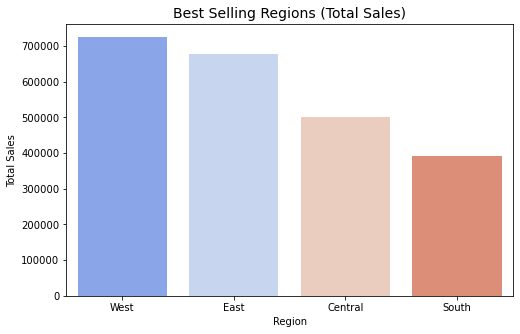

In [28]:
# Sort values for better visualization
Best_selling_region = Best_selling_region.sort_values(by='Sales', ascending=False)

# Plot with Seaborn
plt.figure(figsize=(8,5))
sns.barplot(data=Best_selling_region, x='Region', y='Sales', palette="coolwarm")
plt.title("Best Selling Regions (Total Sales)", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()